# LGMVIP_DEC21

## INTERMEDIATE LEVEL TASK-02 

### Name   : Trupti Gotaphode

### Batch : December 

### Domain : Data Science

#### Importing Required Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the data file

In [16]:
df=pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [20]:
df.shape

(181691, 135)

In [21]:
#clean some data
df.rename(columns={'iyear':'Year',
                       'imonth':'Month',
                       'iday':'Day',
                       'country_txt':'Country',
                       'region_txt':'Region',
                       'attacktype1_txt':'AttackType',
                       'target1':'Target',
                       'nkill':'Killed',
                       'nwound':'Wounded',
                       'summary':'Summary',
                       'gname':'Group',
                       'targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type',
                       'motive':'Motive'},
              inplace=True)

In [22]:
# select useful columns from dataset
df = df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target',
             'Summary','Group','Target_type','Weapon_type','Motive']]

# adding casualities columns
df['casualities']=df['Killed']+df['Wounded']
df.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_5300/2285353151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['casualities']=df['Killed']+df['Wounded']


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


#### Checking for the null values 

In [23]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

#### Checking the information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

In [25]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### Checking the Unique value in dataset

In [26]:
df.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
city            36674
latitude        48322
longitude       48039
AttackType          9
Killed            205
Wounded           238
Target          86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
Motive          14490
casualities       341
dtype: int64

In [27]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [28]:
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [29]:
print('Maximum people killed in an attack are:',df['Killed'].max())

Maximum people killed in an attack are: 1570.0


In [30]:
print("Year with the most attacks:",df['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [31]:
print("Month with the most attacks:",df['Month'].value_counts().idxmax())

Month with the most attacks: 5


In [32]:
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


## Terrorist Activities Over a year

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


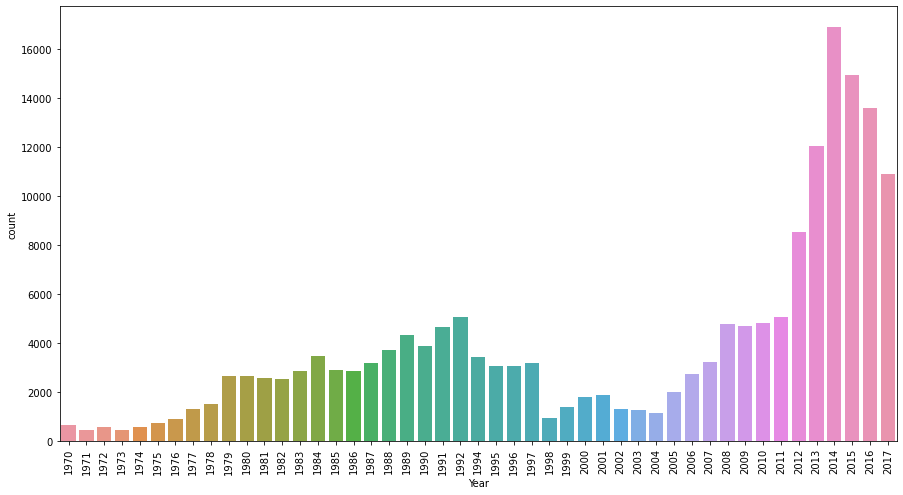

In [33]:
plt.figure(figsize=(15,8))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

## from above plot's we can see that terrorist activites has rapidly increased after 2005 and it was at peak in 2014

## Top 10 Suffering Countries

In [34]:
df['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


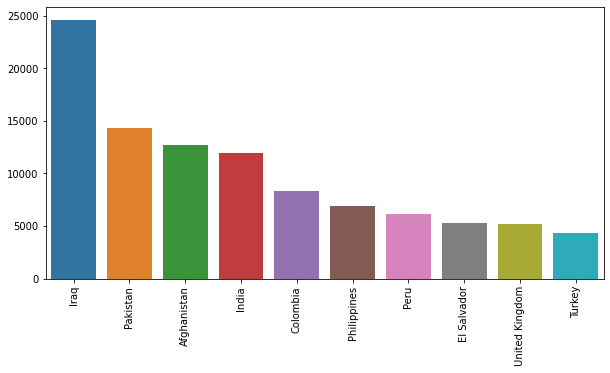

In [35]:
plt.figure(figsize=(10,5))
x = df['Country'].value_counts().values[:10]
y = df['Country'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

## In above plot we can see Iraq is most affected country

## Top 10 Suffering cities

In [36]:
df['city'].value_counts().head(10)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


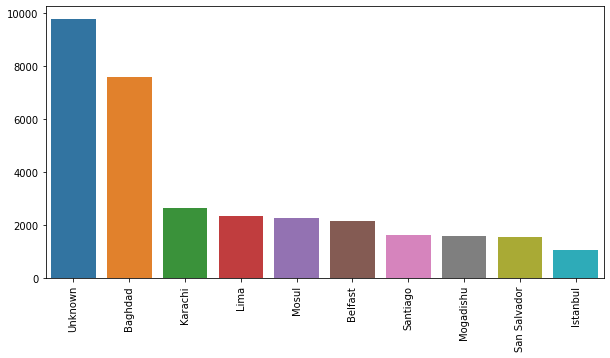

In [37]:
plt.figure(figsize=(10,5))
x = df['city'].value_counts().values[:10]
y = df['city'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

## Top 10 Suffering Region

In [38]:
df['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


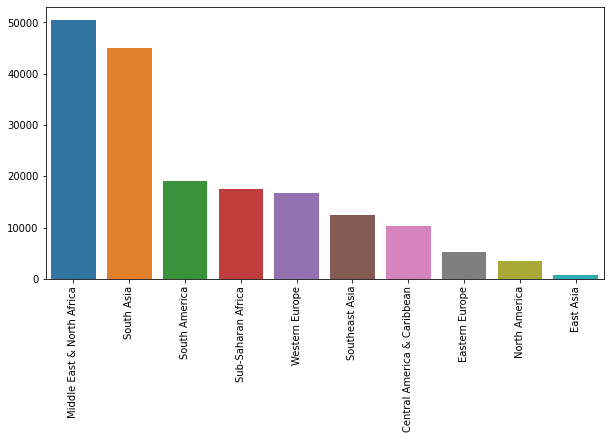

In [39]:
plt.figure(figsize=(10,5))
x = df['Region'].value_counts().values[:10]
y = df['Region'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

## Middle east and north africa are most suffering region

## Let's see country wise

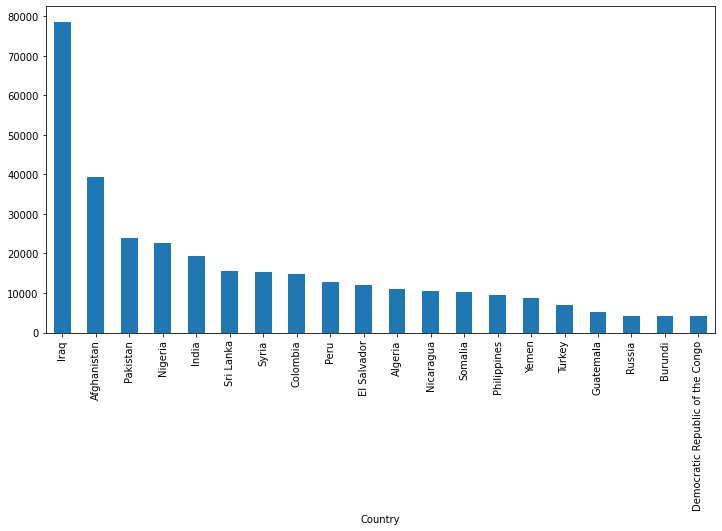

In [40]:
plt.figure(figsize=(12,6))
df.groupby('Country')['Killed'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Region wise killing

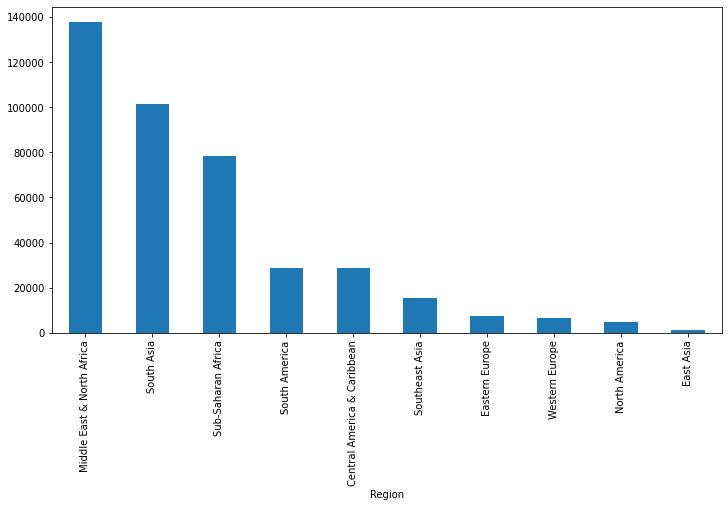

In [41]:
plt.figure(figsize=(12,6))
df.groupby('Region')['Killed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Terrorist most preferable attack type

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


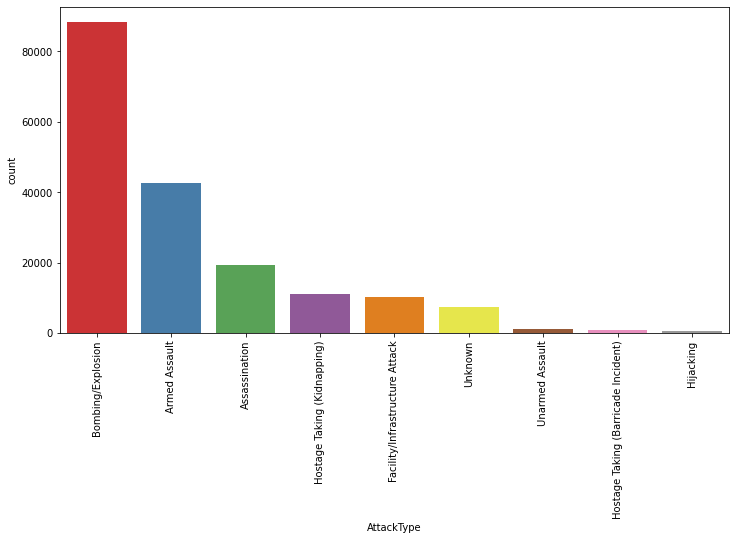

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(df['AttackType'],order=df['AttackType'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

## Bombing/Explosion is most preferable attack type

## Terrorist Preferable target type

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


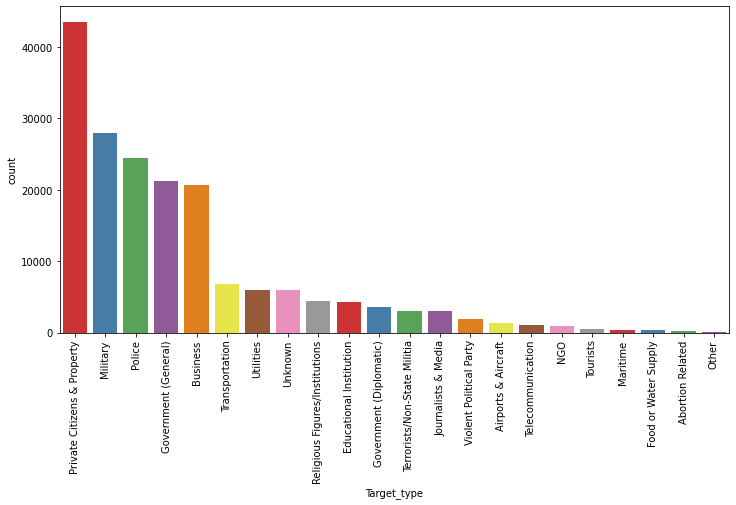

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(df['Target_type'],order=df['Target_type'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

## They mostly target private citizens and property

## Terrorist group with highest attack

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


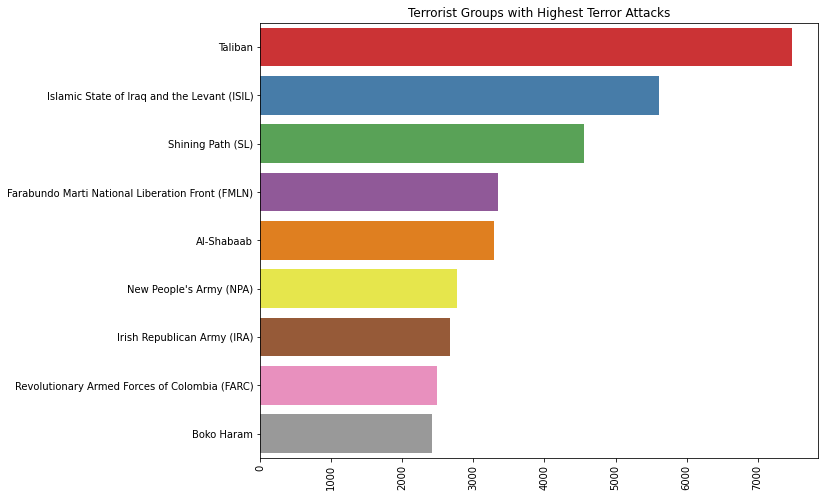

In [44]:
sns.barplot(df['Group'].value_counts()[1:10].values,df['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## Terrorism in india

In [45]:
group_country = df.groupby('Country')
india = group_country.get_group('India')

## Most affected cities of india

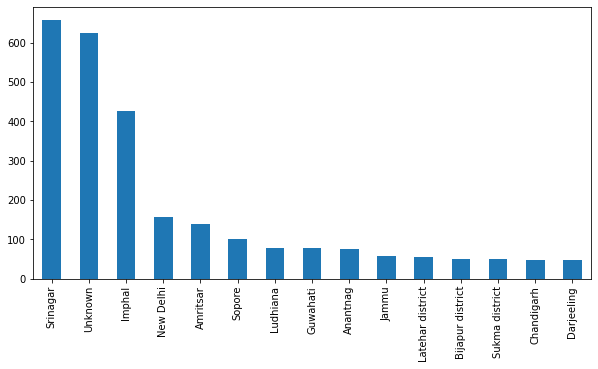

In [46]:
india['city'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.show()

## Srinagar is most effected city in india

## Terrorist activites trends over the year

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


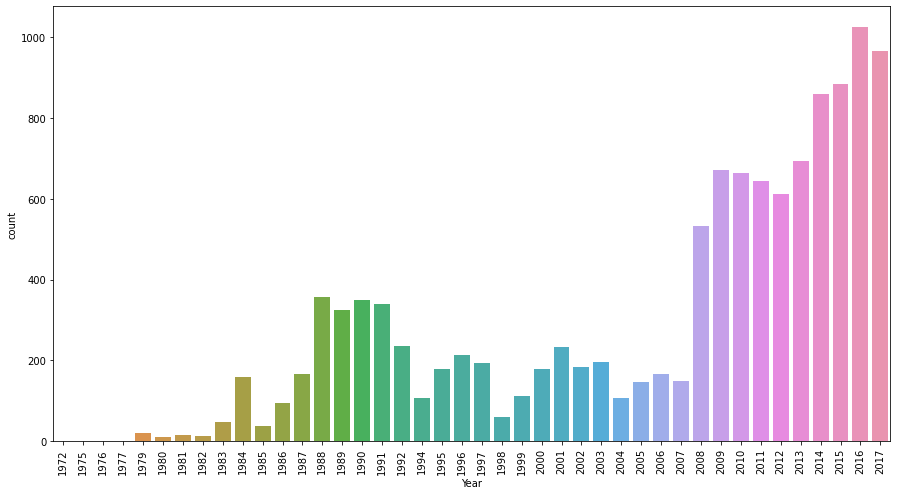

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(india['Year'])
plt.xticks(rotation=90)
plt.show()

## Deadlist terrorist group in india

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


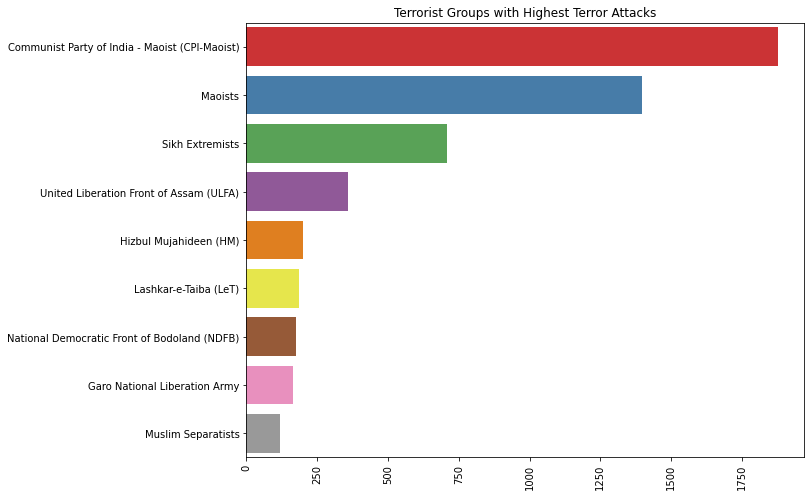

In [48]:
sns.barplot(india['Group'].value_counts()[1:10].values,india['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## Killing trends over a year

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


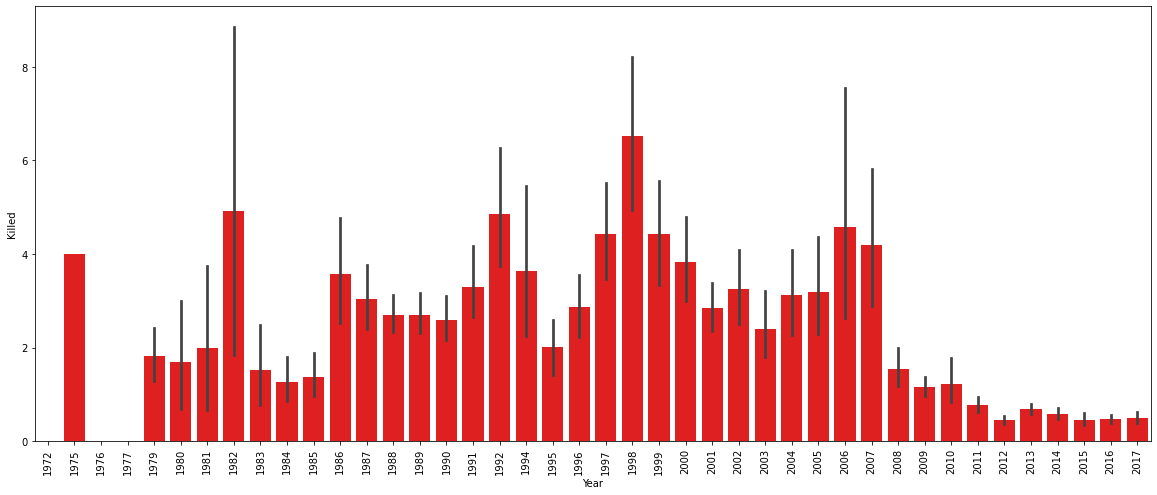

In [49]:
plt.figure(figsize=(20,8))
sns.barplot(india['Year'],india['Killed'],color='red')
plt.xticks(rotation=90)
plt.show()

## Most preferable type of attack in india

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


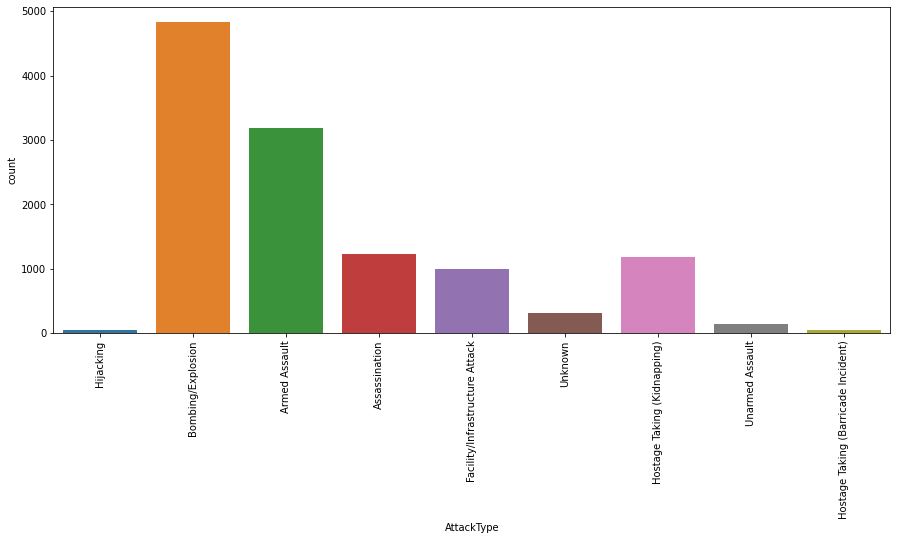

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(india['AttackType'])
plt.xticks(rotation=90)
plt.show()

## Conclusion

### Hot zones of terrorism is Middle east and North Arica so, all the countries should focus in these region. Iraq, Afganistan and Pakistan most suffered country, Government should be aware from the citizens of these countries.Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.Government should tighten borders and should strict arms law.All country should have to make pact to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.

In [ ]:
Thanku You